In [5]:
import numpy as np
import pandas as pd
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
img = cv2.imread('c://python//sharapova1.jpg')



In [7]:
img.shape


(555, 700, 3)

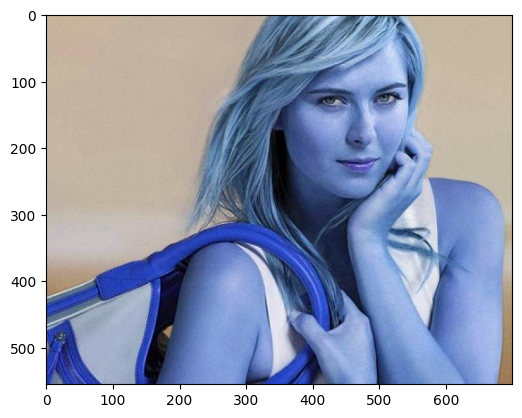

In [8]:
plt.imshow(img)

In [9]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [10]:
gray.shape

(555, 700)

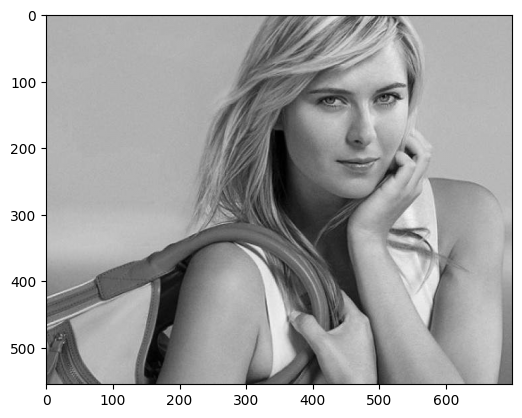

In [11]:
plt.imshow(gray,cmap="gray")

In [12]:
face_cascade=cv2.CascadeClassifier("c://SPC//model//opencv//haarcascades//haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier("c://SPC//model//opencv//haarcascades//haarcascade_eye.xml")

In [13]:
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [14]:
(x,y,w,h)=faces[0]

In [15]:
x,y,w,h

(np.int32(352), np.int32(38), np.int32(233), np.int32(233))

In [16]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)

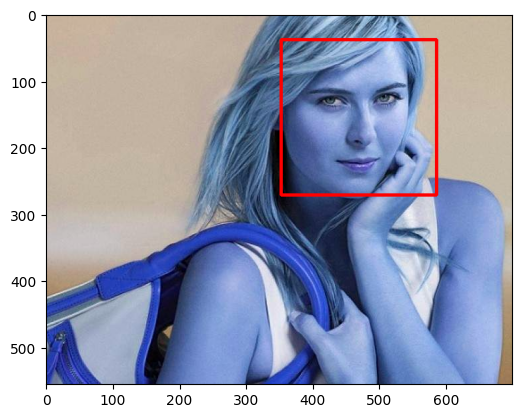

In [17]:
plt.imshow(face_img)

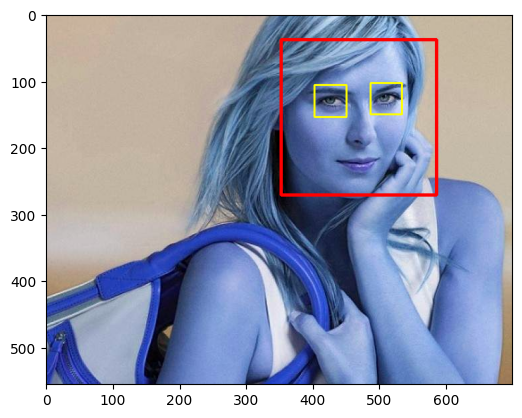

In [18]:
cv2.destroyAllWindows()

for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]  
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 255, 0), 2)

plt.figure()
plt.imshow(face_img, cmap="gray") 
plt.show()

In [19]:
%matplotlib inline

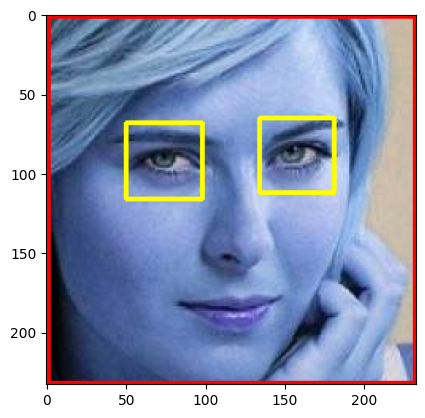

In [20]:
plt.imshow(roi_color,cmap="gray")

In [21]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [22]:
original_img = cv2.imread('c://python//sharapova1.jpg')

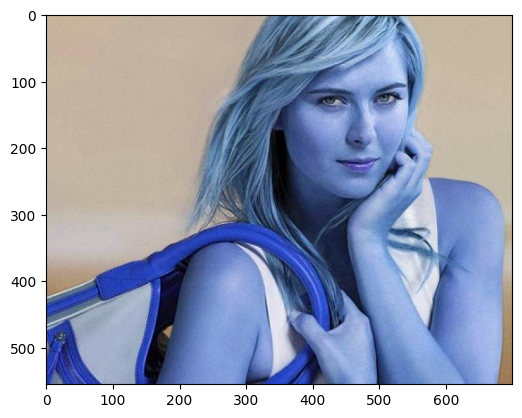

In [23]:
plt.imshow(original_img)

In [24]:
cropped_image=get_cropped_image_if_2_eyes('c://python//sharapova1.jpg')

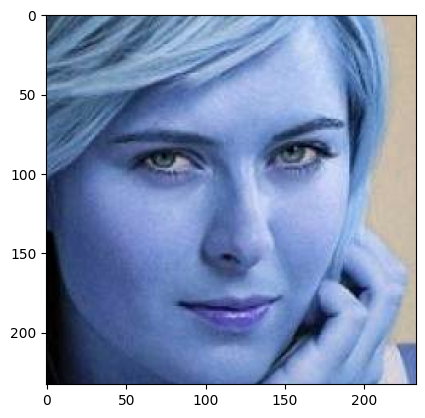

In [25]:
plt.imshow(cropped_image)

In [26]:
org_image_obstructed=cv2.imread("c://python//sharapova2.jpg")

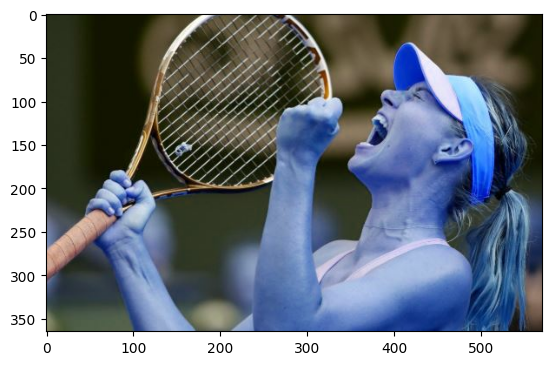

In [27]:
plt.imshow(org_image_obstructed)

In [28]:
cropped_image_no_2_eyes=get_cropped_image_if_2_eyes('c://python//sharapova2.jpg')

In [29]:
cropped_image_no_2_eyes

In [30]:
path_to_data="c:/SPC/model/images_dataset"
path_to_cr_data="c:/SPC//model/images_dataset/cropped"

In [31]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)


In [32]:
img_dirs

['c:/SPC/model/images_dataset\\cropped',
 'c:/SPC/model/images_dataset\\lionel_messi',
 'c:/SPC/model/images_dataset\\maria_sharapova',
 'c:/SPC/model/images_dataset\\roger_federer',
 'c:/SPC/model/images_dataset\\serena_williams',
 'c:/SPC/model/images_dataset\\virat_kohli']

In [33]:
import shutil
import os
import cv2

if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

cropped_image_dirs = []
celebrity_file_names_dict = {}
img_dirs = [
    'c://SPC//model//images_dataset/lionel_messi',
    'c://SPC//model//images_dataset/maria_sharapova',
    'c://SPC//model//images_dataset/roger_federer', 
    'c://SPC//model//images_dataset/serena_williams',
    'c://SPC//model//images_dataset/virat_kohli'
]


path_to_cr_data = 'c://SPC//model//images_dataset/cropped/'



for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
   
        if entry.is_file() and entry.name.lower().endswith(('.jpg', '.jpeg', '.png')):
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cr_data, celebrity_name)  
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print('Generating cropped images in folder: ', cropped_folder)
                
                cropped_file_name = celebrity_name + str(count) + ".png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1



lionel_messi
Generating cropped images in folder:  c://SPC//model//images_dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  c://SPC//model//images_dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  c://SPC//model//images_dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  c://SPC//model//images_dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  c://SPC//model//images_dataset/cropped/virat_kohli


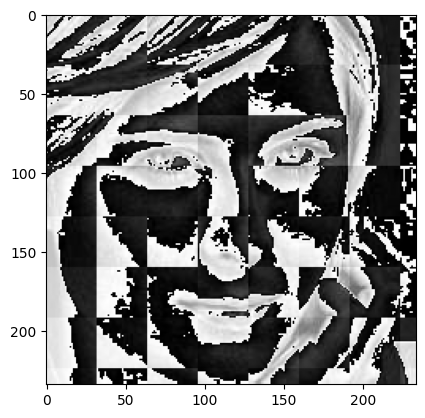

In [34]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
 
    imarray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    
    imarray = np.float32(imarray)
    imarray /= 255
    

    coeff = pywt.wavedec2(imarray, mode, level=level)
    

    coeff_H = list(coeff)
    coeff_H[0] *= 0
    
    imarray_H = pywt.waverec2(coeff_H, mode)
    imarray_H *= 255
    imarray_H = np.uint8(imarray_H)
    
    return imarray_H


img_har = w2d(cropped_image, 'db1', 5)
plt.imshow(img_har, cmap='gray')

In [35]:
class_dict={}
c=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=c
    c=c+1
class_dict


{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [36]:

X=[]
Y=[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scaled_img_haar=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scaled_raw_img.reshape(32*32*3,1), scaled_img_haar.reshape(32*32,1)))
        X.append(combined_img)
        Y.append(celebrity_name)

In [37]:
len(X[0])

4096

In [38]:
X=np.array(X).reshape(len(X),4096).astype(float)


In [39]:
X.shape

(142, 4096)

In [40]:
X[0]

array([100., 129., 140., ..., 237., 234., 232.], shape=(4096,))

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [42]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel="rbf",C=10))
])
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

pipeline.score(x_test,y_test)

0.6666666666666666

In [43]:
X[0]


array([100., 129., 140., ..., 237., 234., 232.], shape=(4096,))

In [44]:
X


array([[100., 129., 140., ..., 237., 234., 232.],
       [ 90.,  66.,  67., ...,  36., 247.,  23.],
       [ 42.,  44.,  51., ...,   4.,  55.,   5.],
       ...,
       [211., 222., 226., ..., 213., 178.,  17.],
       [252., 252., 252., ..., 101., 102.,   3.],
       [ 25.,  25.,  27., ...,  75.,  41.,  51.]], shape=(142, 4096))

In [45]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

   lionel_messi       0.88      0.70      0.78        10
maria_sharapova       1.00      0.80      0.89         5
  roger_federer       1.00      0.29      0.44         7
serena_williams       0.40      0.40      0.40         5
    virat_kohli       0.53      1.00      0.69         9

       accuracy                           0.67        36
      macro avg       0.76      0.64      0.64        36
   weighted avg       0.76      0.67      0.65        36



In [46]:
from sklearn.model_selection import GridSearchCV

model_params = {
    'svm': {
        'model': SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1, 10, 100],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1, 5, 10]
        }
    }
}

In [47]:

from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scores = []
best_estimators = {}

for algo, mp in model_params.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', mp['model'])
    ])
    pipeline_params = {}
    for key, value in mp['params'].items():
        param_name = key.split('__')[-1]
        pipeline_params[f'model__{param_name}'] = value
    
    clf = GridSearchCV(
        pipeline, 
        pipeline_params, 
        cv=5, 
        return_train_score=False,
        scoring='accuracy',
        n_jobs=-1
    )
    
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
print(df)

C:\Users\Aniket k atiyaar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Aniket k atiyaar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


                 model  best_score                                 best_params
0                  svm    0.802597  {'model__C': 1, 'model__kernel': 'linear'}
1        random_forest    0.667965                  {'model__n_estimators': 5}
2  logistic_regression    0.821212                             {'model__C': 5}


In [48]:
best_estimators['svm'].score(x_test,y_test)

0.8333333333333334

In [49]:
best_estimators['random_forest'].score(x_test,y_test)

0.6111111111111112

In [50]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.8611111111111112

In [51]:
best_clf=best_estimators['svm']

In [52]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(x_test))
cm

array([[8, 0, 0, 1, 1],
       [0, 4, 0, 1, 0],
       [0, 0, 7, 0, 0],
       [0, 1, 0, 3, 1],
       [0, 0, 1, 0, 8]])

Text(95.72222222222221, 0.5, 'TRUTH')

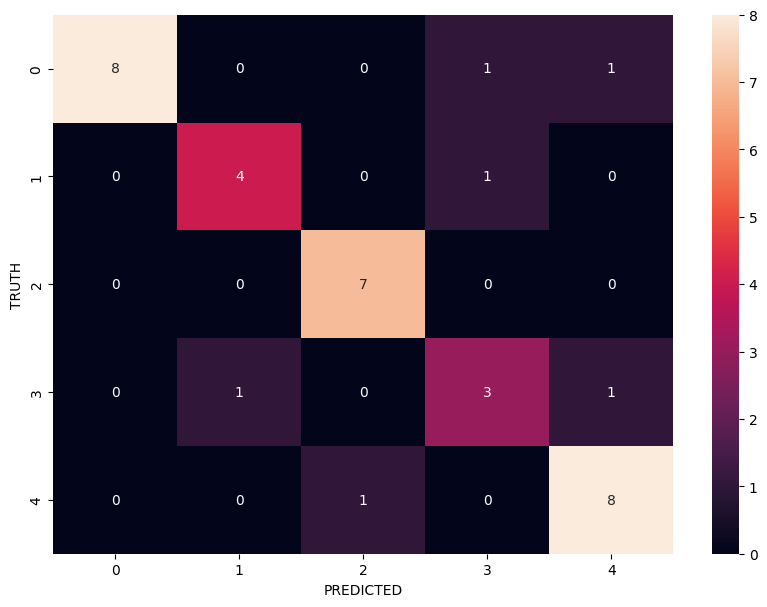

In [53]:
import seaborn as  sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("PREDICTED")
plt.ylabel("TRUTH")

In [54]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [55]:
!pip install joblib


In [56]:
import joblib

In [57]:
joblib.dump(best_clf,"c://SPC//model//saved_model.pkl")

['c://SPC//model//saved_model.pkl']

In [58]:
import json
with open("c://SPC//model//class_dictionary.json",'w') as f:
    f.write(json.dumps(class_dict))